# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아봅니다.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install missingno

In [3]:
!pip install plotnine

  Found existing installation: matplotlib 2.2.2
    Uninstalling matplotlib-2.2.2:
      Successfully uninstalled matplotlib-2.2.2
  Found existing installation: pandas 0.23.0
    Uninstalling pandas-0.23.0:
      Successfully uninstalled pandas-0.23.0


In [6]:
!pip show missingno
!pip show plotnine

Name: missingno
Version: 0.4.1
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: c:\users\user\anaconda3\lib\site-packages
Requires: numpy, matplotlib, seaborn, scipy
Required-by: 
Name: plotnine
Version: 0.5.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\users\user\anaconda3\lib\site-packages
Requires: descartes, numpy, patsy, scipy, matplotlib, mizani, pandas, statsmodels
Required-by: 


In [18]:
import pandas as pd
from plotnine import *

In [8]:
# 현재 위치정보를 봅니다.
%pwd

'D:\\gittest\\test\\test\\pythonwork\\store'

In [9]:
%ls data

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0006-765E

 D:\gittest\test\test\pythonwork\store\data 디렉터리

2019-03-30  오후 12:43    <DIR>          .
2019-03-30  오후 12:43    <DIR>          ..
2019-03-30  오전 09:12           228,781 foo1.csv
2019-03-30  오전 11:22        42,574,428 상권별_업종밀집통계_2017_.csv
2019-03-12  오전 09:47       229,310,855 소상공인시장진흥공단_상가업소정보_201812_1.csv
2019-03-12  오전 09:59       209,210,018 소상공인시장진흥공단_상가업소정보_201812_2.csv
2019-03-12  오전 10:20       350,285,333 소상공인시장진흥공단_상가업소정보_201812_3.csv
2019-03-12  오전 10:36       318,748,011 소상공인시장진흥공단_상가업소정보_201812_4.csv
               6개 파일       1,150,357,426 바이트
               2개 디렉터리  411,148,214,272 바이트 남음


# 2016년 상권별 업종밀집 통계
* 상권별 밀집도를 보여준다.

In [11]:
shop = pd.read_csv('data/상권별_업종밀집통계_2017_.csv',  engine='python')
shop.shape

(824275, 6)

In [12]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824275 entries, 0 to 824274
Data columns (total 6 columns):
상권명칭         824275 non-null object
상권번호         824275 non-null int64
관리년월         824275 non-null int64
대분류명         824275 non-null object
중분류명         519760 non-null object
과밀지수(밀집도)    824275 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ MB


In [26]:
shop.dtypes

상권명칭          object
상권번호           int64
관리년월           int64
대분류명          object
중분류명          object
과밀지수(밀집도)    float64
dtype: object

In [27]:
shop.head()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
0,인천종합터미널,1713,201701,소매,가전제품소매,0.9847
1,송우리시외버스터미널_2,2399,201701,소매,가전제품소매,1.6518
2,남선공원,1217,201701,소매,가전제품소매,0.4912
3,인천 연수구 연수2동_1,1683,201701,소매,가전제품소매,1.7180
4,부산 연제구 연산동역_4,439,201701,소매,가전제품소매,2.1680


In [28]:
shop.tail()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
824270,제주시청,20,201712,소매,NaN,0.4968
824271,전북 군산시 수송동_1,1045,201712,업종분류불능,NaN,1.3153
824272,단구동 프리미엄아울렛,2536,201712,업종분류불능,NaN,1.0946
824273,충북 제천시 중앙.의림_1,1453,201712,업종분류불능,NaN,1.0575
824274,전남 목포시 신흥동_4,99,201712,소매,NaN,1.5871


In [29]:
shop['대분류명'].value_counts()

소매        810093
업종분류불능     14182
Name: 대분류명, dtype: int64

In [30]:
shop['중분류명'].value_counts()

건강/미용식품         99494
유아용품            89464
의약/의료품소매        81969
철물/난방/건설자재소매    79848
페인트/유리제품소매      74268
가전제품소매          71992
자동차/자동차용품       22725
Name: 중분류명, dtype: int64

# 상가업소정보 2018년 12월

In [16]:
%ls data

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0006-765E

 D:\GitTest\bigdata\kgitbank_bigdata\store\data 디렉터리

2019-03-31  오전 10:23    <DIR>          .
2019-03-31  오전 10:23    <DIR>          ..
2019-03-31  오전 10:08           228,781 foo1.csv
2019-03-12  오전 09:47       229,310,855 소상공인시장진흥공단_상가업소정보_201812_1.csv
               2개 파일         229,539,636 바이트
               2개 디렉터리  424,877,314,048 바이트 남음


In [19]:
# 상가업소정보 2018년 6월 데이터
shop_2018_12 = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_201812_1.csv', engine='python')
shop_2018_12.shape

(499328, 39)

In [20]:
shop_2018_12.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [21]:
shop_2018_12.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
499325,16093078,체크페이먼트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010600109050000028207,성아빌딩,서울특별시 강남구 역삼로69길 10,135841,6196.0,NaN,NaN,NaN,127.054001,37.502210
499326,16093122,마젠타네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1144010200104630000002585,마포현대하이엘,서울특별시 마포구 마포대로 173,121862,4130.0,NaN,1,NaN,126.954442,37.549892
499327,16093154,GS25,역촌대로점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1138010800100090007000001,서부빌딩,서울특별시 은평구 연서로 92,122895,3401.0,NaN,1,NaN,126.915538,37.607334


In [22]:
shop_2018_12.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '상권업종소분류명', '시도명', '시군구명', 
              '행정동명', '법정동명', '지번주소', '경도', '위도']
shop_2018_12[view_columns].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,127.061026,37.493922
1,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,127.047883,37.505675
2,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,126.899220,37.471711
3,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,128.980455,35.159774
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,127.104071,37.500249


In [31]:
# 생각보다 결측치가 많다.
shop_2018_12.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

In [ ]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumBarunGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [38]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumBarunGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.font_manager._rebuild()

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

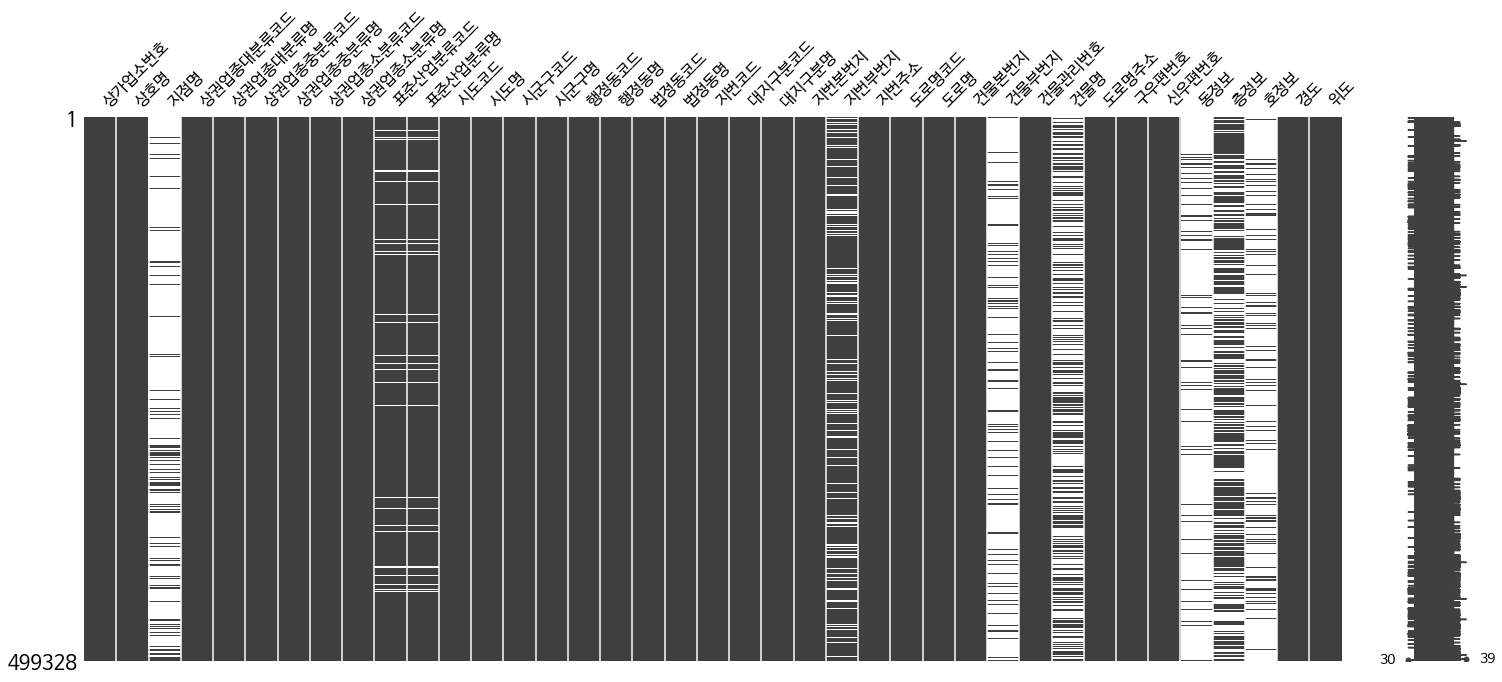

In [39]:
import missingno as msno

msno.matrix(shop_2018_12)

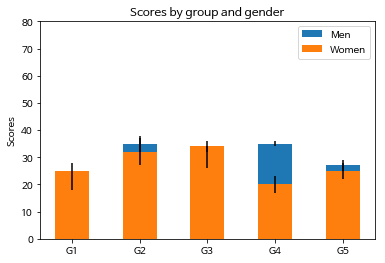

In [45]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

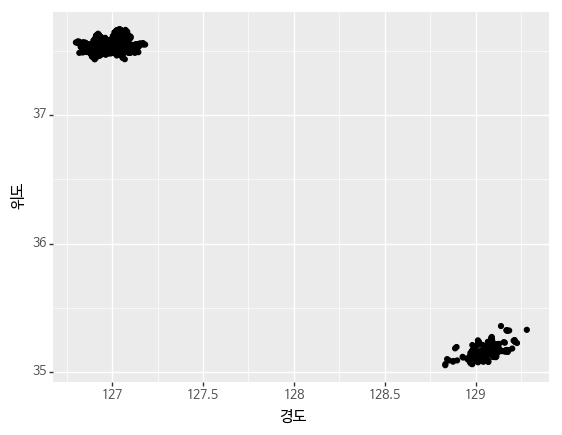

<ggplot: (115592135828)>

In [47]:
# 모든 데이터를 한번에 찍으면 너무 오래 걸려서 1000개만 찍어봅니다.
# 양쪽에 데이터가 몰려있는데 왜 그런지 주소 정보를 다시보겠습니다.
(ggplot(shop_2018_12[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [49]:
# 데이터를 보니 서울과 부산만 있는거 같다. 
# 그래서 서울과 그 외 데이터로 나눠봤다.
shop_seoul = shop_2018_12.loc[shop_2018_12['도로명주소'].str.startswith('서울')]
shop_busan = shop_2018_12.loc[shop_2018_12['도로명주소'].str.startswith('부산')]
shop_except_seoul = shop_2018_12.loc[~shop_2018_12['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_busan.shape)
print(shop_except_seoul.shape)

(345268, 39)
(154060, 39)
(154060, 39)


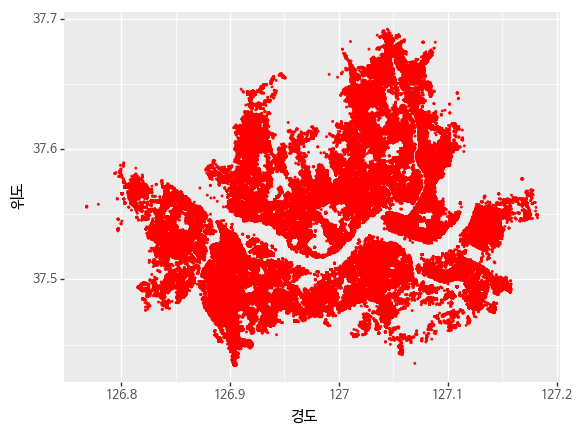

<ggplot: (-9223371921262218422)>

In [52]:
# 서울만 찍어봤더니 서울지도 비슷하게 나온다
(ggplot(shop_seoul)
 + aes(x='경도', y='위도')
 + geom_point(color='red', alpha=0.9, size=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
)


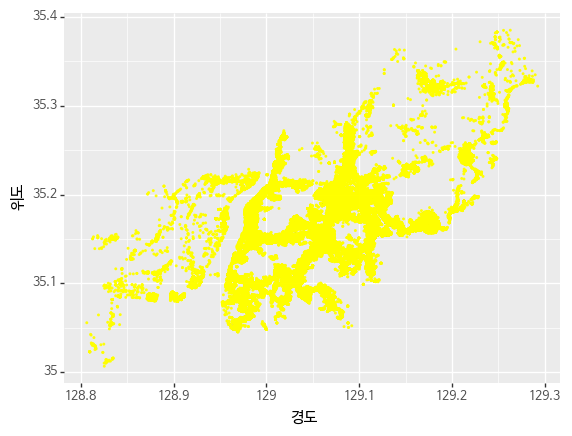

<ggplot: (-9223371921262303863)>

In [55]:
(ggplot(shop_busan)
 + aes(x='경도', y='위도')
 + geom_point(color='yellow', alpha=0.9, size=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
)


In [56]:
shop_2018_12['도로명주소'].head()

0    서울특별시 강남구 남부순환로 2933
1      서울특별시 강남구 선릉로93길 6
2      서울특별시 금천구 가산로 34-6
3        부산광역시 사상구 괘감로 37
4        서울특별시 송파구 가락로 71
Name: 도로명주소, dtype: object

In [59]:
shop_2018_12['시도'] = shop_2018_12['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_12['구군'] = shop_2018_12['도로명주소'].str.split(' ', expand=True)[1]
print(shop_2018_12.shape)
shop_2018_12.columns

(499328, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [20]:
# 서울만 찍어봤더니 서울지도 비슷하게 나온다
# 서울 DF을 다시 만들어 준다.
shop_seoul = shop_2018_12.loc[shop_2018_12['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(345268, 39)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\guides\guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


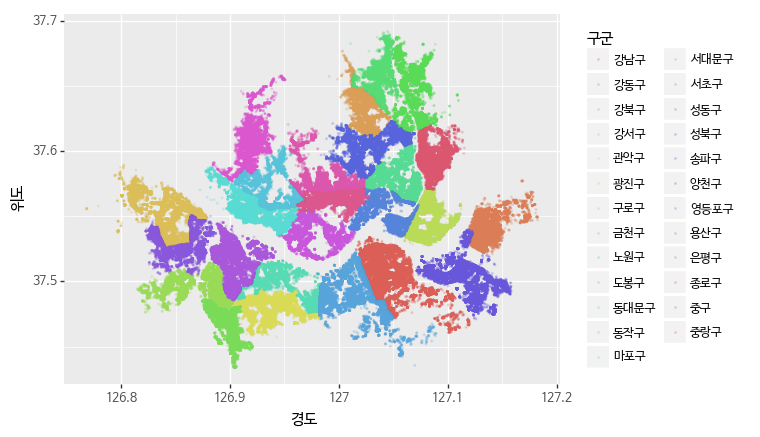

<ggplot: (115592204187)>

In [62]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point(alpha=0.2, size=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [63]:
shop_seoul['상권업종대분류명'].value_counts()

음식          112894
소매          106490
생활서비스        57266
학문/교육        27717
의료           15299
부동산          13164
관광/여가/오락      9536
숙박            2790
스포츠            112
Name: 상권업종대분류명, dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\plotnine\guides\guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


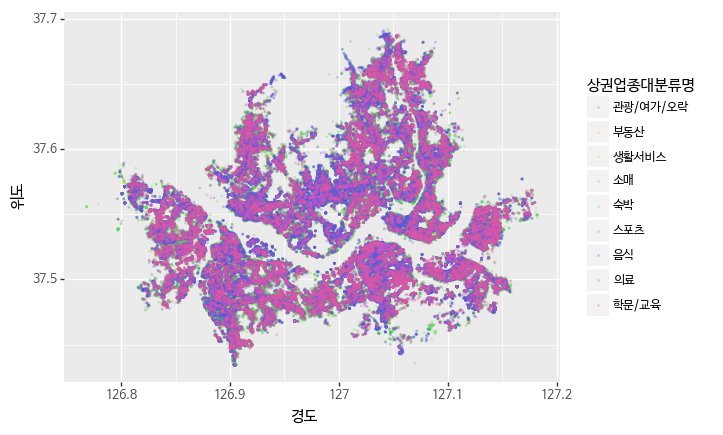

<ggplot: (-9223371921199510321)>

In [64]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='상권업종대분류명')
 + geom_point(alpha=0.2, size=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## 학문/교육과 관련된 정보 보기

In [ ]:
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## 부동산과 관련된 정보 보기

In [1]:
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '부동산']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point(size=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

NameError: name 'shop_seoul' is not defined

### 학원-컴퓨터

C:\Users\user\Anaconda3\lib\site-packages\plotnine\guides\guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


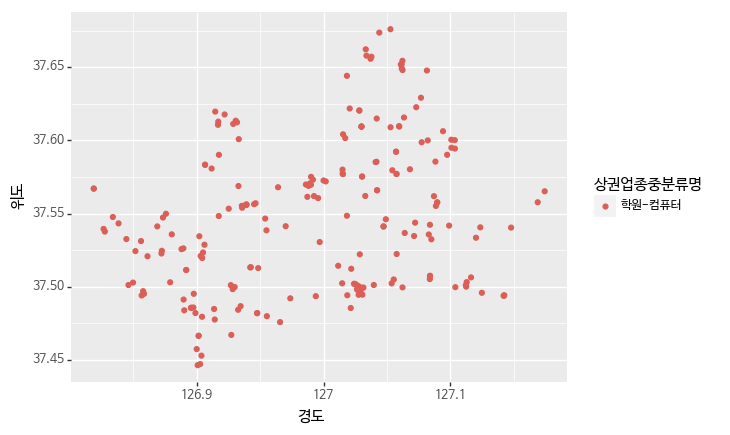

<ggplot: (108021037993)>

In [21]:
shop_seoul_edu = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '학원-컴퓨터']

(ggplot(shop_seoul_edu)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [12]:
!pip install folium

In [27]:
import folium

def show_marker_map(geo_df):
    map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                     zoom_start=12, tiles='Stamen Terrain')

    for n in geo_df.index:
        shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
        folium.Marker([geo_df.loc[n, '위도'], 
                       geo_df.loc[n, '경도']], 
                      popup=shop_name).add_to(map)

    return map

In [28]:
show_marker_map(shop_seoul_edu)

#### 편의점 카페 분포 보기

In [29]:
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명'] == '커피점/카페']

(ggplot(shop_seoul_eat)
 + aes(x='경도', y='위도', color='구군')
 + geom_point(size=0.7)
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

PlotnineError: "Could not evaluate the 'color' mapping: '구군' (original error: name '구군' is not defined)"

In [30]:
shop_seoul_eat.shape

(16349, 39)

In [31]:
geo_df = shop_seoul_eat[shop_seoul_eat["구군"] == "중구"]

map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=16, tiles='Stamen Terrain')

for n in geo_df.index:
    shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=shop_name).add_to(map)

map

KeyError: '구군'

## 서울 외 지역 보기

In [ ]:
# 부산만 있는거 같습니다.
# 서울만 제외한 나머지 지역으로 DF을 다시 생성해 줍니다.
shop_except_seoul = shop_2018_12.loc[~shop_2018_12['도로명주소'].str.startswith('서울')]
(ggplot(shop_except_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point(size=0.7)
 + theme(text=element_text(family='NanumBarunGothic'))
)